In [28]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
%matplotlib inline

# IMPORT DATASETS

IMDB,TM,TN

In [29]:
# connect IMDB
con =sqlite3.connect('zippedData/im.db')

In [30]:
# IMDB READ

df_IMDB = pd.read_sql("""
SELECT b.primary_title AS title,b.genres AS genres,r.averagerating AS ratings,r.numvotes AS votes,b.start_year
FROM movie_ratings AS r
LEFT JOIN movie_basics AS b
ON r.movie_id = b.movie_id
ORDER BY ratings DESC
""",con)
df_IMDB.head()

,title,genres,ratings,votes,start_year
0,The Paternal Bond: Barbary Macaques,Documentary,10.0,5,2015
1,Requiem voor een Boom,Documentary,10.0,5,2016
2,Freeing Bernie Baran,"Crime,Documentary",10.0,5,2010
3,Hercule contre Hermès,Documentary,10.0,5,2012
4,Pick It Up! - Ska in the '90s,Documentary,10.0,5,2019


In [31]:
df_tn = pd.read_csv('zippedData/tn.movie_budgets.csv')
df_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [32]:
df_TM = pd.read_csv('zippedData/tmdb.movies.csv')
df_TM

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


# COMBINE DATASETS

df <br>
IMDB + TN + TM <br>
2000+ movies

dfl <br>
(df LARGE) <br>
IMDB + TM <br>
23000+ movies

In [33]:
df = pd.merge(df_IMDB,df_TM,how='inner',left_on='title',right_on='title')

In [34]:
df = df.drop_duplicates()

In [35]:
df = df.merge(df_tn,left_on='title',right_on='movie')

In [36]:
df = df.drop_duplicates(subset='title')

In [37]:
df.sample(5)

,title,genres,ratings,votes,start_year,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
2227,Maggie,Drama,6.4,16,2018,14260,"[27, 18, 9648]",287424,en,Maggie,13.000,2015-05-08,5.3,958,47,"May 8, 2015",Maggie,"$4,500,000","$187,112","$1,027,760"
2417,Somewhere,"Comedy,Drama",6.3,40250,2010,275,"[35, 18]",39210,en,Somewhere,7.596,2010-12-22,6.1,376,42,"Dec 22, 2010",Somewhere,"$7,000,000","$1,785,645","$17,023,121"
981,Nocturnal Animals,"Drama,Thriller",7.5,205240,2016,17445,"[18, 53]",340666,en,Nocturnal Animals,16.190,2016-11-18,7.4,4192,3,"Nov 18, 2016",Nocturnal Animals,"$22,500,000","$10,663,357","$32,398,681"
1431,Easy A,"Comedy,Drama,Romance",7.1,330125,2010,39,[35],37735,en,Easy A,14.690,2010-09-17,6.8,4168,67,"Sep 17, 2010",Easy A,"$8,000,000","$58,401,464","$76,200,721"
2608,The Last Witch Hunter,"Action,Adventure,Fantasy",6.0,86118,2015,14221,"[14, 28, 12, 878]",274854,en,The Last Witch Hunter,16.685,2015-10-23,5.8,2193,96,"Oct 23, 2015",The Last Witch Hunter,"$80,000,000","$27,367,660","$130,818,912"


In [38]:
dfl = pd.merge(df_IMDB,df_TM,how='inner',left_on='title',right_on='title')

In [39]:
dfl.sample(5)

,title,genres,ratings,votes,start_year,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count
1853,Wretch,Horror,2.6,5,2019,25869,[27],574856,en,Wretch,1.325,2018-09-13,4.0,1
11995,Entanglement,Crime,6.0,511,2011,22262,"[35, 18, 10749]",456022,en,Entanglement,1.364,2017-05-19,5.2,6
3437,Dream/Killer,"Crime,Documentary",7.5,315,2015,16020,[99],333099,en,Dream/Killer,0.845,2015-04-19,6.8,6
18268,Speed Kills,"Action,Crime,Drama",4.1,1563,2018,24202,"[80, 18, 53]",466411,en,Speed Kills,9.518,2018-11-16,5.4,36
8884,Purgatorio: A Journey Into the Heart of the Bo...,Documentary,6.6,21,2013,13609,[99],200392,es,Purgatorio: Viaje al corazón de la frontera,0.600,2014-10-03,7.0,3


# DATA CLEANING

### df data cleaning

In [40]:
df = df[['title','genres','ratings','votes','release_date_x','production_budget','worldwide_gross']]

In [41]:
df = df.dropna()

In [42]:
df.sample(5)

,title,genres,ratings,votes,release_date_x,production_budget,worldwide_gross
1026,Rudderless,"Comedy,Drama,Music",7.5,16303,2014-10-17,"$5,000,000","$567,219"
2440,Red Lights,"Drama,Fantasy,Horror",6.2,55287,2012-07-12,"$17,700,000","$14,518,884"
1961,Blood Done Sign My Name,Drama,6.6,494,2010-02-01,"$10,000,000","$109,383"
3093,Vamps,"Comedy,Horror,Romance",5.2,8838,2012-11-02,"$16,000,000","$94,812"
340,Incendies,"Drama,Mystery,War",8.3,124156,2010-09-04,"$6,800,000","$16,038,343"


In [43]:
df['genres'] = df['genres'].apply(lambda x: x.split(','))

In [44]:
df

,title,genres,ratings,votes,release_date_x,production_budget,worldwide_gross
0,Crossroads,[Documentary],9.3,22,2017-10-14,"$12,000,000","$57,000,000"
12,The Runaways,[Adventure],9.2,47,2010-03-19,"$9,500,000","$5,278,632"
14,The Wall,[Documentary],9.2,8,2013-06-07,"$3,000,000","$4,495,262"
22,Survivor,"[Biography, Crime, Documentary]",9.0,45,2012-08-29,"$20,000,000","$1,703,281"
28,Frankenstein,[Drama],9.0,1832,2015-08-15,"$45,000,000","$112,006,296"
...,...,...,...,...,...,...,...
3356,Red River,[Horror],2.3,179,2011-05-05,"$3,000,000","$9,012,000"
3357,Snow White: A Deadly Summer,[Horror],2.2,679,2012-03-16,"$1,000,000",$0
3358,United Passions,"[Drama, History, Sport]",2.1,3878,2015-06-05,"$30,000,000","$168,832"
3359,Foodfight!,"[Action, Animation, Comedy]",1.9,8248,2013-05-07,"$45,000,000","$73,706"


In [45]:
df['genres'] = df['genres'].map(lambda x: random.choice(x))

In [46]:
objects_to_floats = ['production_budget','worldwide_gross']

for x in objects_to_floats:
    df[x] = df[x].str.replace('$',"")
    df[x] = df[x].str.replace(',',"")

In [47]:
df['genres'] = df['genres'].astype('category')

In [48]:
df['production_budget'] = df['production_budget'].astype('float')

In [49]:
# turn the budget to million
df['production_budget'] = df['production_budget']/1000000

In [50]:
df.rename(columns = {'production_budget':'production_budget_million'}, inplace = True)

In [51]:
df

,title,genres,ratings,votes,release_date_x,production_budget_million,worldwide_gross
0,Crossroads,Documentary,9.3,22,2017-10-14,12.0,57000000
12,The Runaways,Adventure,9.2,47,2010-03-19,9.5,5278632
14,The Wall,Documentary,9.2,8,2013-06-07,3.0,4495262
22,Survivor,Biography,9.0,45,2012-08-29,20.0,1703281
28,Frankenstein,Drama,9.0,1832,2015-08-15,45.0,112006296
...,...,...,...,...,...,...,...
3356,Red River,Horror,2.3,179,2011-05-05,3.0,9012000
3357,Snow White: A Deadly Summer,Horror,2.2,679,2012-03-16,1.0,0
3358,United Passions,Sport,2.1,3878,2015-06-05,30.0,168832
3359,Foodfight!,Action,1.9,8248,2013-05-07,45.0,73706


In [52]:
df['worldwide_gross'] = df['worldwide_gross'].astype('float')

In [53]:
df['release_date_x'] = pd.to_datetime(df['release_date_x'] )

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1775 entries, 0 to 3360
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   title                      1775 non-null   object        
 1   genres                     1775 non-null   category      
 2   ratings                    1775 non-null   float64       
 3   votes                      1775 non-null   int64         
 4   release_date_x             1775 non-null   datetime64[ns]
 5   production_budget_million  1775 non-null   float64       
 6   worldwide_gross            1775 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 99.6+ KB


### dfl data cleaning

In [55]:
dfl = dfl.drop_duplicates()

In [56]:
dfl = dfl.dropna()

In [57]:
dfl = dfl[['title','genres','ratings','votes','release_date']]

In [58]:
dfl['genres'] = dfl['genres'].apply(lambda x: x.split(','))

In [59]:
dfl['genres'] = dfl['genres'].map(lambda x: random.choice(x))

In [60]:
dfl = dfl.drop_duplicates()

In [61]:
dfl['release_date'] = pd.to_datetime(dfl['release_date'] )

In [62]:
dfl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19261 entries, 0 to 19948
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         19261 non-null  object        
 1   genres        19261 non-null  object        
 2   ratings       19261 non-null  float64       
 3   votes         19261 non-null  int64         
 4   release_date  19261 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 902.9+ KB


In [63]:
dfl.head()

,title,genres,ratings,votes,release_date
0,A Mediocre Documentary with Tom And Dan,Comedy,9.8,5,2018-05-03
1,Love on a Leash,Documentary,9.7,25,2013-08-13
2,Love on a Leash,Romance,9.7,25,2013-08-13
3,Finger of God 2,Documentary,9.5,8,2018-12-04
4,"Hare Krishna! The Mantra, the Movement and the...",Documentary,9.5,829,2017-06-16


# DATA FILTER

In [64]:
df = df[(df['release_date_x'] >= '2010-01-01') & (df['release_date_x'] <= '2018-12-31')]

In [65]:
dfl = dfl[(dfl['release_date'] >= '2010-01-01') & (dfl['release_date'] <= '2018-12-31')]

In [66]:
dfl_genre_counts = dfl.groupby(by='genres')['genres'].count().sort_values(ascending=False).to_frame()

In [67]:
dfl_ratings = dfl[['genres','ratings']]

In [68]:
dfl_ratings.groupby('genres').mean().sort_values(by='ratings',ascending=False)

,ratings
genres,
News,7.127119
Documentary,7.078941
Biography,7.036386
Music,6.843216
Sport,6.802286
History,6.771308
Animation,6.262326
War,6.212381
Drama,6.168527


# TIME TO PLOT!

### df

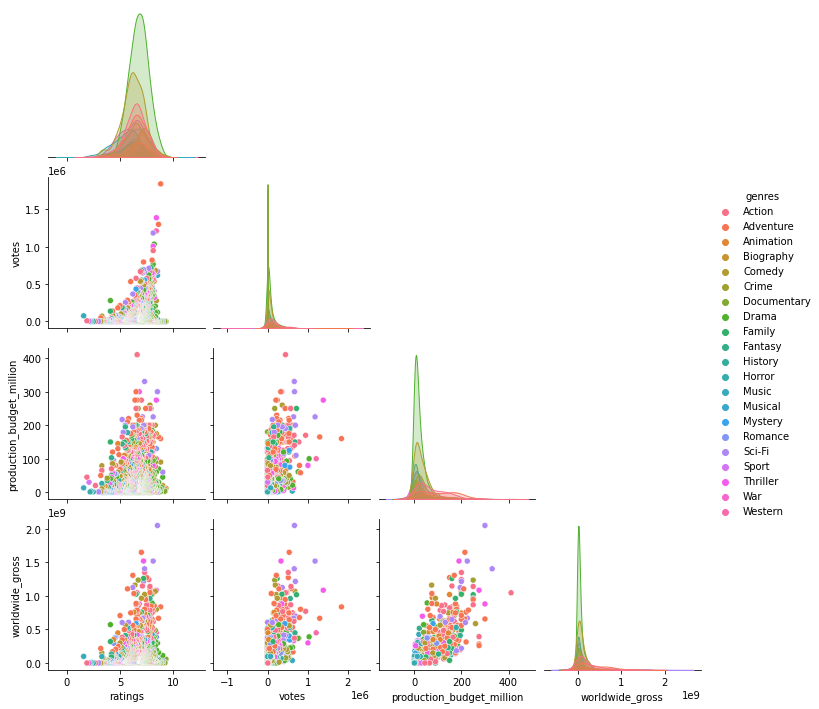

In [69]:
sns.pairplot(df, hue = 'genres', corner = True);

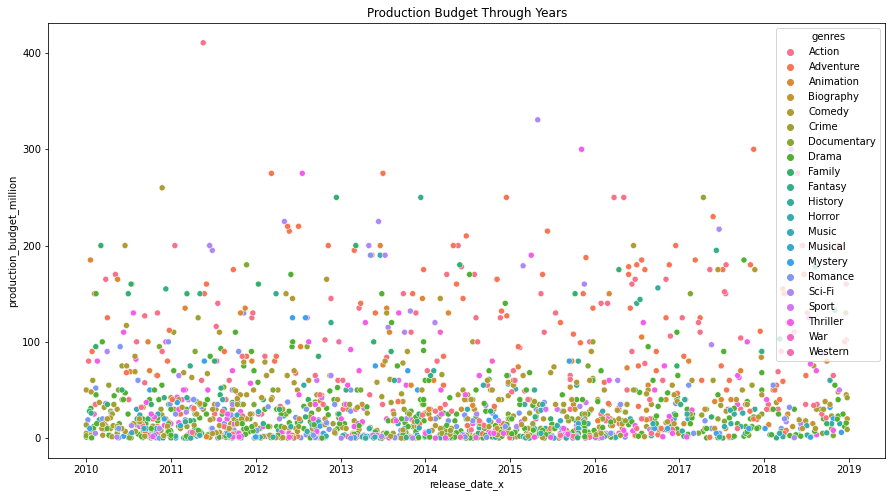

In [70]:
fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x = 'release_date_x', y = 'production_budget_million', hue = 'genres', data = df, ax = ax)
ax.set_title('Production Budget Through Years');

# no trend?

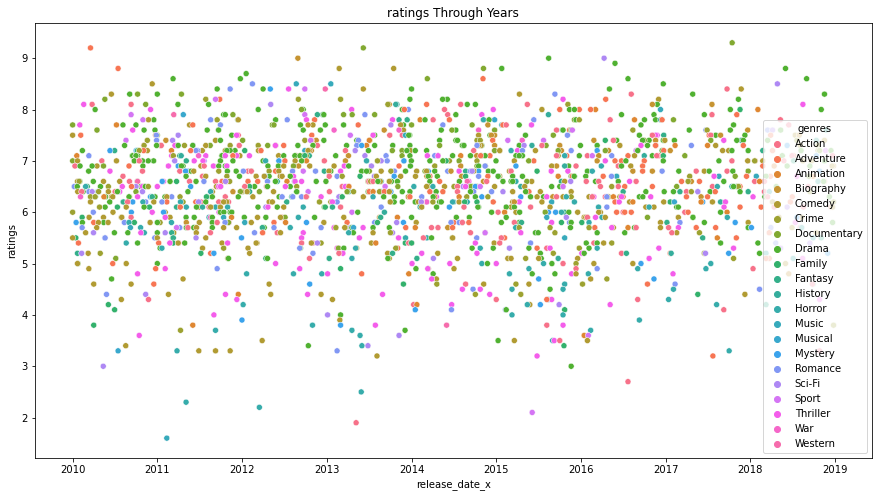

In [71]:
fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x = 'release_date_x', y = 'ratings', hue = 'genres', data = df, ax = ax)
ax.set_title('ratings Through Years');

# no trend?

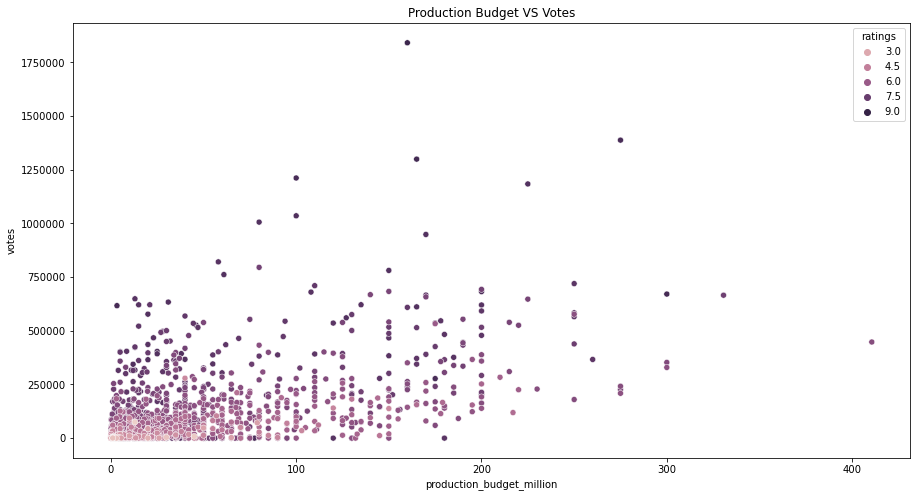

In [72]:
fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x = 'production_budget_million', y = 'votes', hue = 'ratings', data = df, ax = ax)
ax.set_title('Production Budget VS Votes')
ax.ticklabel_format(useOffset=False,style='plain');

# jeff got this

### dfl

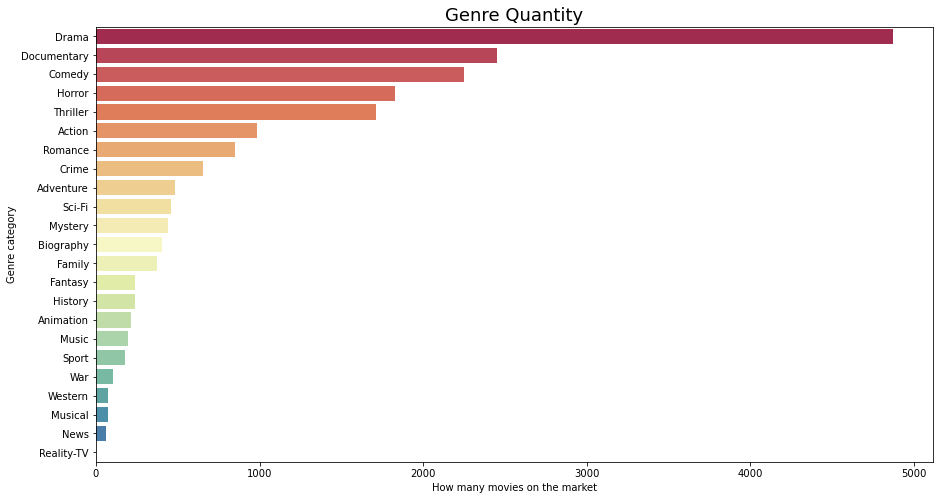

In [74]:
fig,ax = plt.subplots(figsize=(15,8))
sns.set_palette("Set1", 8, .75)
sns.barplot(y = dfl_genre_counts.index, x = 'genres',palette='Spectral', data = dfl_genre_counts, ax = ax)
ax.set_title('Genre Quantity',fontsize = 18)
ax.set_xlabel('How many movies on the market')
ax.set_ylabel('Genre category');

# filter downsample to top 10

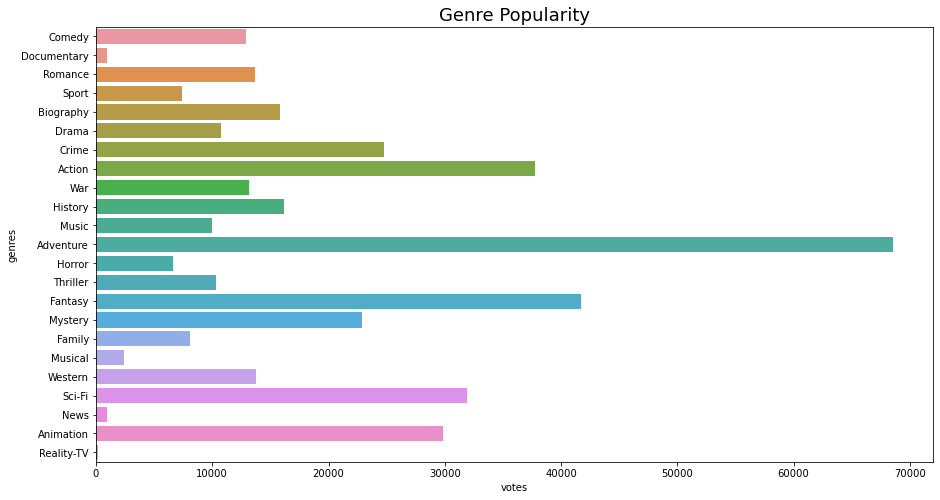

In [75]:
# which genre gets more votes/popularity

fig,ax = plt.subplots(figsize=(15,8))
sns.barplot(x = 'votes', y = 'genres', ci=None, data = dfl, ax = ax)
ax.set_title('Genre Popularity',fontsize = 18);

# pick action? 
# jeff got similar plot, so no recommendation on my plot

In [ ]:
# try to calculate weighted ratings
# dfl['sum_ratings'] = dfl['ratings'] * dfl['votes']

In [ ]:
# dflg = dfl.groupby('genres').sum()
# dflg['weight_avg_rating'] = dflg['sum_ratings'] / dflg['votes']

In [77]:
# easy solution to get the average ratings and votes
dflg = dfl.groupby('genres').mean()

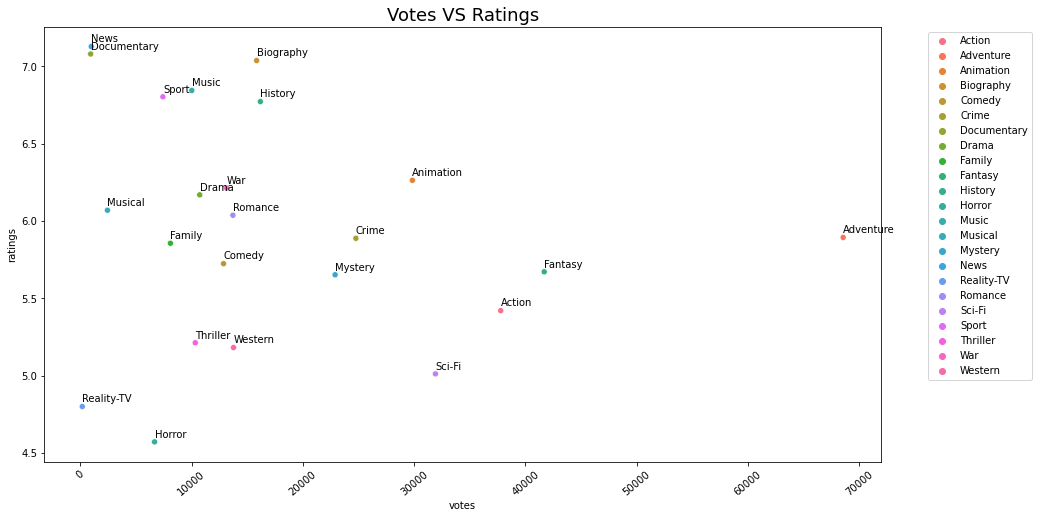

In [80]:
# votes/popularity VS ratings, hue with selected genres
# normal mean

fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x = 'votes', y = 'ratings', hue = 'genres', data = dflg, ax = ax)
ax.set_title('Votes VS Ratings',fontsize = 18)
plt.xticks(rotation = 40)
ax.legend(bbox_to_anchor=(1.05, 1))

for i in range(dflg.shape[0]):
    plt.text(x = dflg.votes[i], y = dflg.ratings[i]+0.03, s = dflg.index[i])

In [81]:
# dflg1 to calculate weighted ratings
dflg1 = dfl
dflg1

,title,genres,ratings,votes,release_date
0,A Mediocre Documentary with Tom And Dan,Comedy,9.8,5,2018-05-03
1,Love on a Leash,Documentary,9.7,25,2013-08-13
2,Love on a Leash,Romance,9.7,25,2013-08-13
3,Finger of God 2,Documentary,9.5,8,2018-12-04
4,"Hare Krishna! The Mantra, the Movement and the...",Documentary,9.5,829,2017-06-16
...,...,...,...,...,...
19944,Captain Battle: Legacy War,Sci-Fi,1.3,369,2013-01-12
19945,Justin Bieber: Always Believing,Documentary,1.2,392,2013-01-01
19946,Hell at My Heels,Western,1.1,102,2011-01-01
19947,"Kidnapping, Caucasian Style",Comedy,1.1,335,2014-12-17


In [82]:
dflg1['ratings*votes'] = dflg1['ratings'] * dflg1['votes']

In [83]:
dfl_weighted_ratings = dflg1.groupby('genres').sum()

In [85]:
dfl_weighted_ratings['weighted_ratings'] = dfl_weighted_ratings['ratings*votes'] / dfl_weighted_ratings['votes']

In [86]:
dfl_weighted_ratings

,ratings,votes,ratings*votes,weighted_ratings
genres,,,,
Action,5322.2,37098801,2.554834e+08,6.886568
Adventure,2846.3,33110607,2.366048e+08,7.145891
Animation,1346.4,6415441,4.655409e+07,7.256569
Biography,2842.7,6400855,4.773921e+07,7.458256
Comedy,12866.2,28930355,1.892557e+08,6.541770
Crime,3844.5,16170770,1.141203e+08,7.057194
Documentary,17378.8,2270262,1.670238e+07,7.357028
Drama,30065.4,52276861,3.727723e+08,7.130732
Family,2184.1,3019001,2.043067e+07,6.767361


In [87]:
dfl.groupby('genres')['genres'].count().sort_values(ascending=False).head(10).index

Index(['Drama', 'Documentary', 'Comedy', 'Horror', 'Thriller', 'Action',
       'Romance', 'Crime', 'Adventure', 'Sci-Fi'],
      dtype='object', name='genres')

In [88]:
dfl_weighted_ratings.index

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object', name='genres')

In [89]:
# select top 10 genres in quantity

selected_genre = dfl.groupby('genres')['genres'].count().sort_values(ascending=False).head(10).index
dfl_weighted_ratings_selected = dfl_weighted_ratings[dfl_weighted_ratings.index.isin(selected_genre)]
type(dfl_weighted_ratings_selected)

pandas.core.frame.DataFrame

IndexError: index 10 is out of bounds for axis 0 with size 10

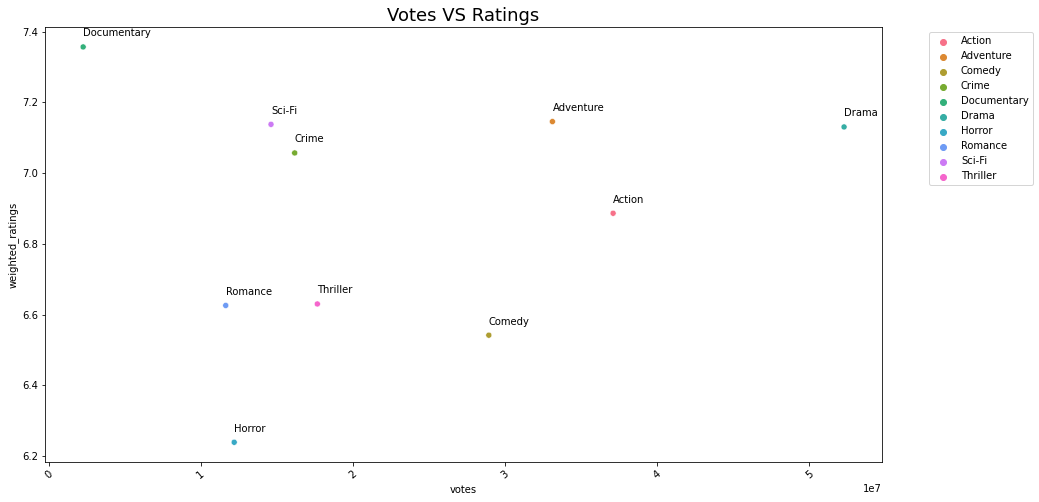

In [90]:
# votes/popularity VS ratings, hue with selected genres
# weighted ratings

fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x = 'votes', y = 'weighted_ratings', hue = dfl_weighted_ratings_selected.index, data = dfl_weighted_ratings_selected, ax = ax)
ax.set_title('Votes VS Ratings',fontsize = 18)
plt.xticks(rotation = 40)
ax.legend(bbox_to_anchor=(1.05, 1))

for i in range(dflg.shape[0]):
    plt.text(x = dfl_weighted_ratings_selected.votes[i], y = dfl_weighted_ratings_selected.weighted_ratings[i]+0.03, s = dfl_weighted_ratings_selected.index[i])

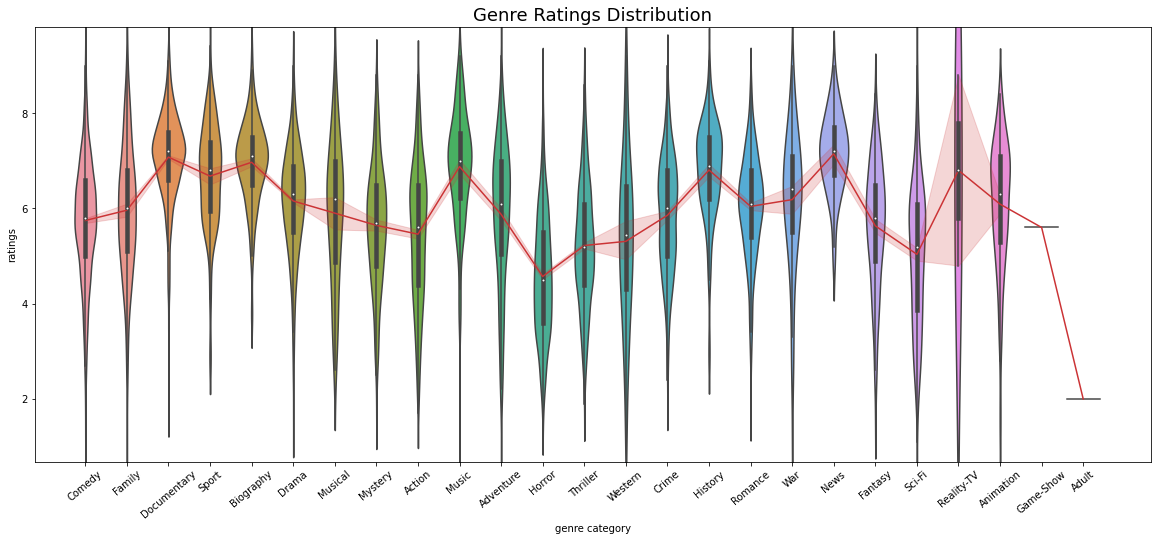

In [84]:
fig,ax = plt.subplots(figsize=(20,8))

sns.violinplot(y = 'ratings', x = 'genres', data = dfl_ratings, ax = ax)
ax.set_title('Genre Ratings Distribution',fontsize = 18)
ax.set_xlabel('genre category')
ax.set_ylabel('ratings')
plt.xticks(rotation = 40)

sns.lineplot(y = 'ratings', x = 'genres', data = dfl_ratings, ax = ax);

# choose Documentary similar to Biography
# choose comedy
# not Action, higher chance to get bad ratings

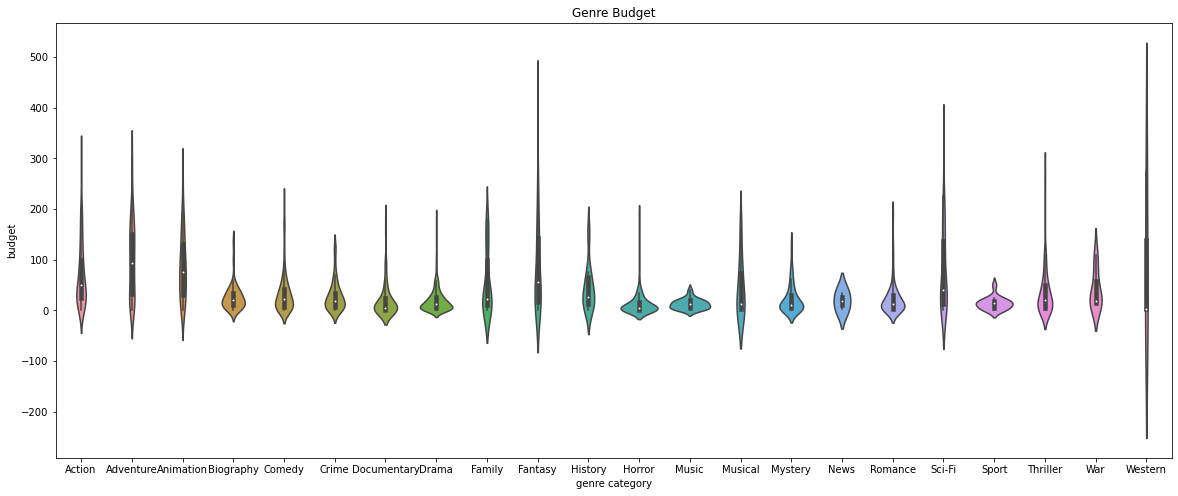

In [120]:
fig,ax = plt.subplots(figsize=(20,8))

sns.violinplot(y = 'production_budget_million', x = 'genres', data = df, ax = ax)
ax.set_title('Genre Budget')
ax.set_xlabel('genre category')
ax.set_ylabel('budget');

# Jeff got a better plot

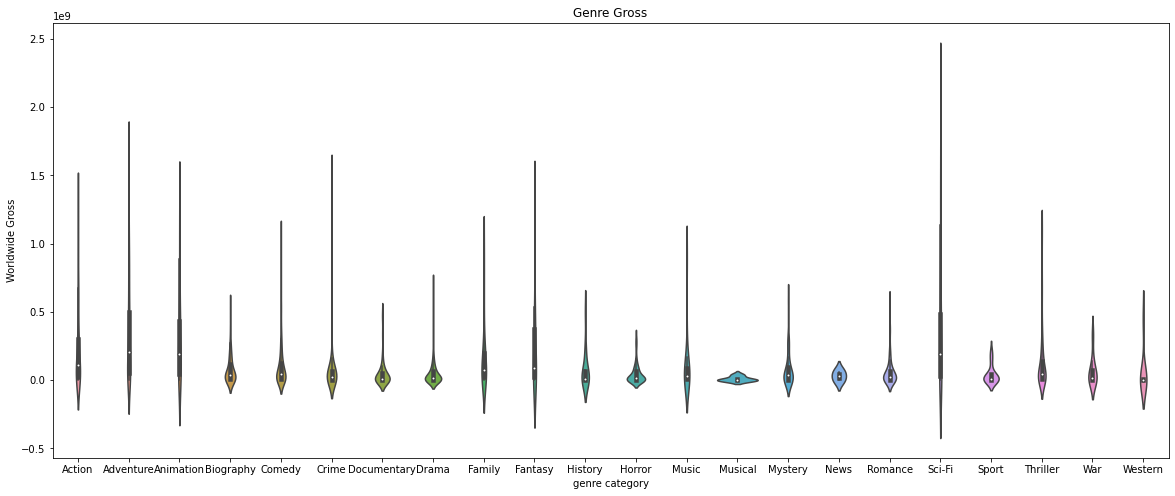

In [118]:
fig,ax = plt.subplots(figsize=(20,8))

sns.violinplot(y = 'worldwide_gross', x = 'genres', data = df, ax = ax, palette = customPalette)
ax.set_title('Genre Gross')
ax.set_xlabel('genre category')
ax.set_ylabel('Worldwide Gross');

# Jeff got this too

# TIME SERIES PLOT - TRENDS

In [60]:
selected_genre = ['Animation','Adventure','Sci-Fi','Drama','Documentary','Biography']

In [61]:
# dfls means df - large dataset - selected genre
dfls = dfl[dfl['genres'].isin(selected_genre)]
dfls

,title,genres,ratings,votes,release_date,ratings*votes
3,Finger of God 2,Documentary,9.5,8,2018-12-04,76.0
4,"Hare Krishna! The Mantra, the Movement and the...",Documentary,9.5,829,2017-06-16,7875.5
6,Standing Up,Biography,9.4,5,2013-08-16,47.0
7,Standing Up,Drama,7.0,2865,2013-08-16,20055.0
8,The Harvest,Documentary,9.4,10,2013-10-19,94.0
...,...,...,...,...,...,...
19934,Izzie's Way Home,Animation,1.6,251,2016-05-17,401.6
19936,Aliens vs. Avatars,Sci-Fi,1.6,1544,2011-09-20,2470.4
19937,Justin Bieber: Never Say Never,Documentary,1.6,74978,2011-02-11,119964.8
19939,Midnight Sex Run,Adventure,1.5,276,2015-04-28,414.0


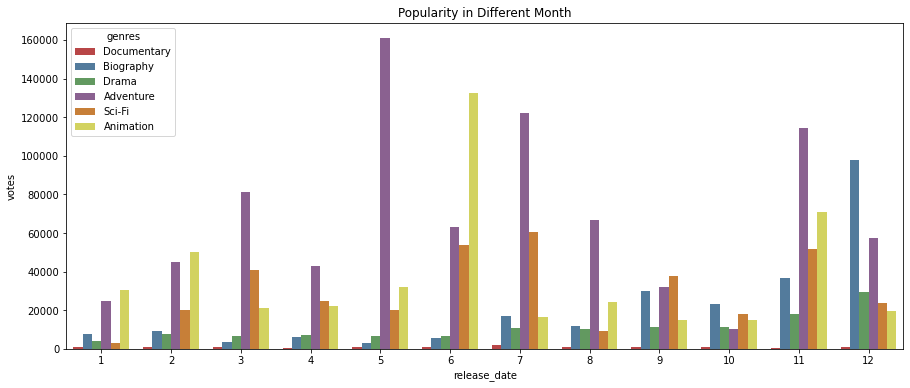

In [70]:
fig,ax = plt.subplots(figsize=(15,6))
sns.barplot(x = pd.DatetimeIndex(dfls.release_date).month, y = 'votes', hue = 'genres', data = dfls, ci = None, ax = ax)
ax.set_title('Popularity in Different Month');

# people like to watch movies in 5/6/7/11/12
# recommend adventure in 11, sci-fi in 5/6/7
# biography in 12

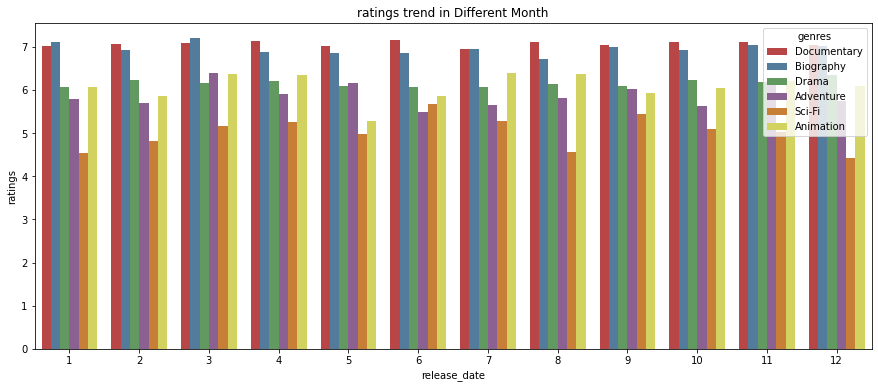

In [63]:
fig,ax = plt.subplots(figsize=(15,6))
sns.barplot(x = pd.DatetimeIndex(dfls.release_date).month, y = 'ratings', hue = 'genres', data = dfls, ci = None, ax = ax)
ax.set_title('ratings trend in Different Month');

# some genre obviously get better ratings in certain month
# need to seperate to grids

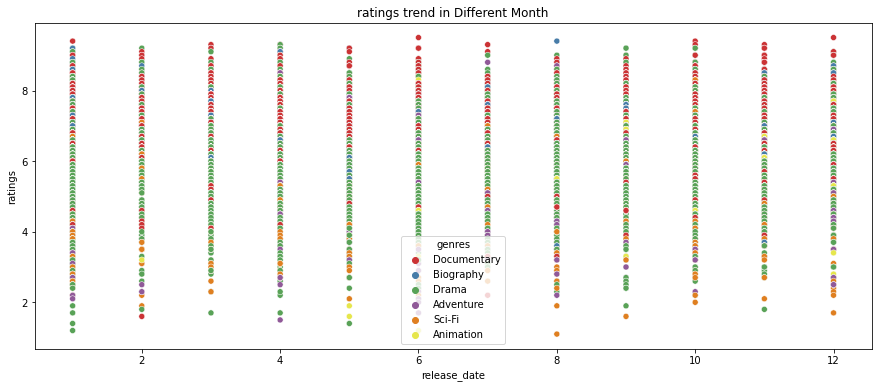

In [64]:
fig,ax = plt.subplots(figsize=(15,6))
sns.scatterplot(x = pd.DatetimeIndex(dfls.release_date).month, y = 'ratings', hue = 'genres', data = dfls, ci = None, ax = ax)
ax.set_title('ratings trend in Different Month');

# an attempt

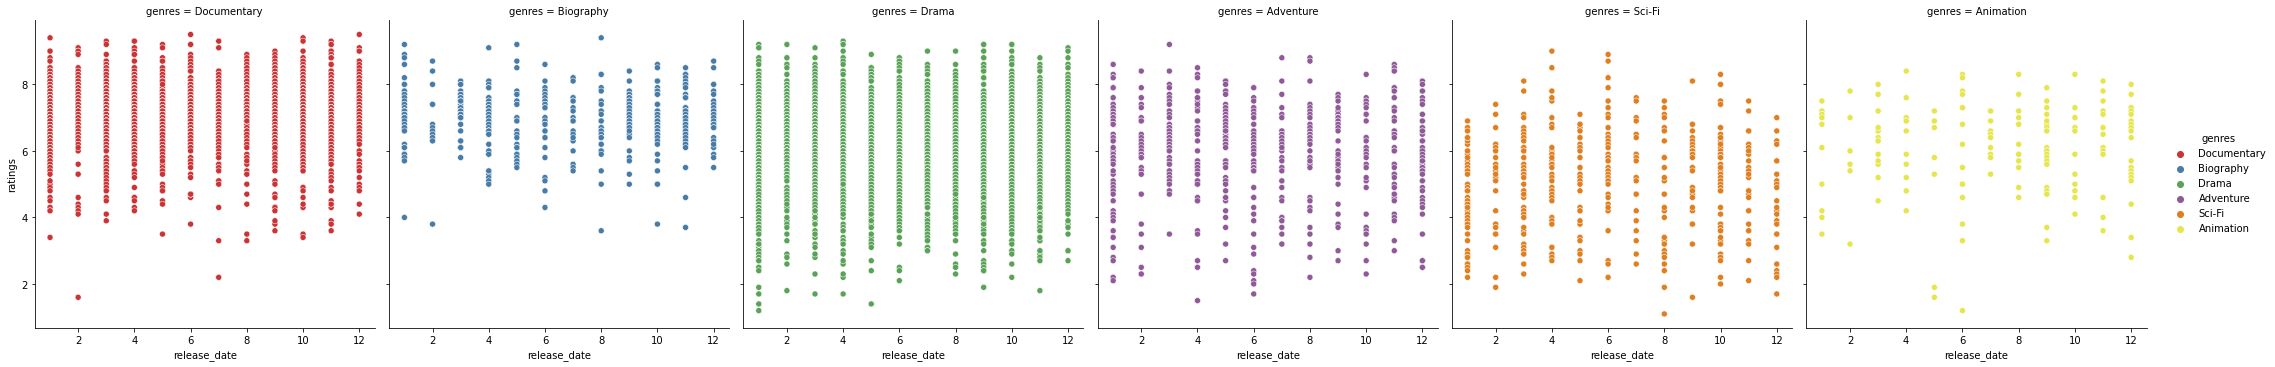

In [65]:
sns.relplot(x = pd.DatetimeIndex(dfls.release_date).month, y = 'ratings', col = 'genres',hue = 'genres', data = dfls)
ax.set_title('ratings trend in Different Month');

# attempts

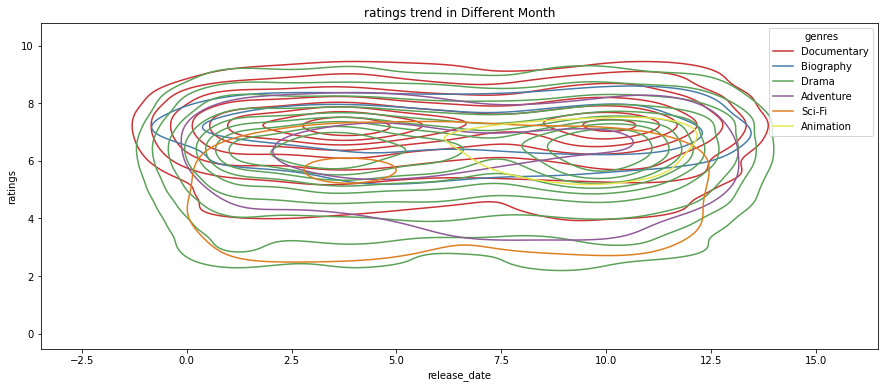

In [66]:
fig,ax = plt.subplots(figsize=(15,6))
sns.kdeplot(x = pd.DatetimeIndex(dfls.release_date).month, y = 'ratings', hue = 'genres', data = dfls, ax = ax)
ax.set_title('ratings trend in Different Month');

# no trend T T

In [67]:
# dfs means df - budget dataset - selected genre
dfs = df[df['genres'].isin(selected_genre)]
dfs.genres.unique()

['Documentary', 'Adventure', 'Biography', 'Drama', 'Sci-Fi', 'Animation']
Categories (6, object): ['Documentary', 'Adventure', 'Biography', 'Drama', 'Sci-Fi', 'Animation']

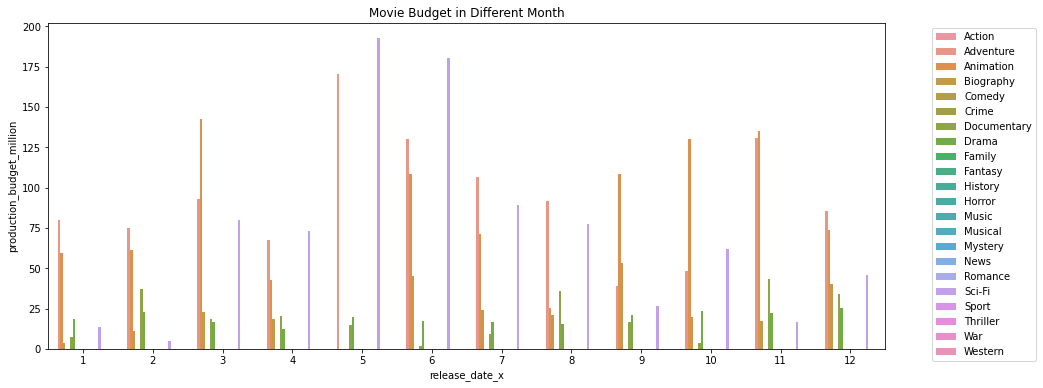

In [68]:
fig,ax = plt.subplots(figsize=(15,6))
sns.barplot(x = pd.DatetimeIndex(dfs.release_date_x).month, y = 'production_budget_million', hue = 'genres', data = dfs, ci = None, ax = ax)
ax.set_title('Movie Budget in Different Month')
ax.legend(bbox_to_anchor=(1.05, 1));

# Movie in 

AttributeError: 'DataFrame' object has no attribute 'release'

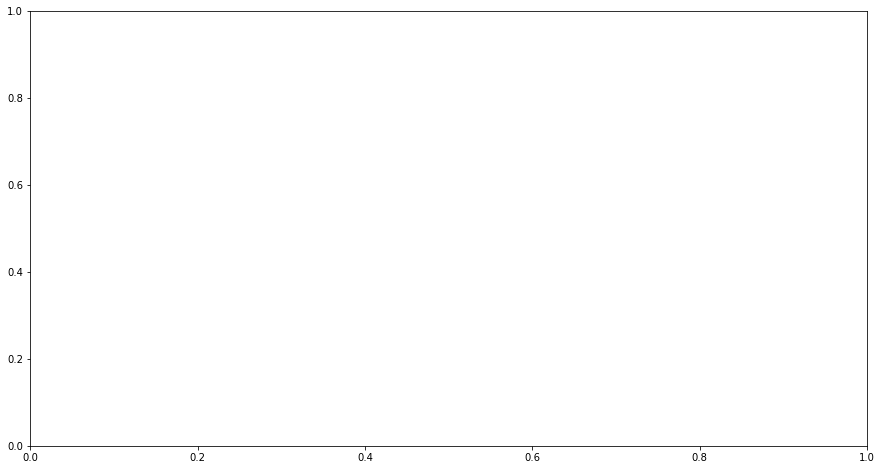

In [69]:
fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x = 'votes', y = 'ratings', hue = dflg.release, data = dfl, ax = ax)
ax.set_title('Votes VS Ratings',fontsize = 18)
plt.xticks(rotation = 40)
ax.legend(bbox_to_anchor=(1.05, 1))

for i in range(dflg.shape[0]):
    plt.text(x = dflg.votes[i], y = dflg.ratings[i]+0.03, s = dflg.index[i])